In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.activations import relu, softmax
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19, RegNetX032
from keras.src.callbacks import History, ModelCheckpoint, EarlyStopping
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
DATASET_PATH: str = '/content/drive/MyDrive/5Animals/'
INPUT_SHAPE: tuple[int, int, int] = (244, 244, 3)
EPOCHS: int = 20
MODEL_SAVE_PATH: str = '/content/drive/MyDrive/5_animals_best'

### Load Dataset

In [ ]:
idg = ImageDataGenerator(
    rotation_range=10,
    zoom_range=.1,
    horizontal_flip=True,
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=.1,
)

In [ ]:
train_dataset = idg.flow_from_directory(
    DATASET_PATH,
    target_size=INPUT_SHAPE[:2],
    subset='training',
)

validation_dataset = idg.flow_from_directory(
    DATASET_PATH,
    target_size=INPUT_SHAPE[:2],
    subset='validation',
)

Found 1171 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


### Train Part

In [ ]:
# vgg = VGG19(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
regnet = RegNetX032(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
regnet.summary()

In [ ]:
model: Sequential = Sequential([
    regnet,
    Flatten(),

    Dense(512, relu),
    Dropout(.2),
    Dense(256, relu),
    Dropout(.2),
    Dense(5, softmax, name='Output_layer'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 regnetx032 (Functional)     (None, 8, 8, 1008)        14350112  
                                                                 
 flatten (Flatten)           (None, 64512)             0         
                                                                 
 dense (Dense)               (None, 512)               33030656  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 Output_layer (Dense)        (None, 5)                 1

In [ ]:
model.compile(
    optimizer=Adam(),
    loss=categorical_crossentropy,
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint(MODEL_SAVE_PATH, save_best_only=True)
stop = EarlyStopping(patience=7)

In [ ]:
history: History = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS, callbacks=[stop, checkpoint]
)

Epoch 1/20
37/37 [==============================] - 188s 3s/step - loss: 4.0809 - accuracy: 0.6712 - val_loss: 1.7943 - val_accuracy: 0.4766
Epoch 2/20
37/37 [==============================] - 43s 1s/step - loss: 0.8225 - accuracy: 0.7822 - val_loss: 5.6730 - val_accuracy: 0.7344
Epoch 3/20
37/37 [==============================] - 75s 2s/step - loss: 0.8839 - accuracy: 0.8147 - val_loss: 0.9380 - val_accuracy: 0.6172
Epoch 4/20
37/37 [==============================] - 77s 2s/step - loss: 0.5411 - accuracy: 0.8190 - val_loss: 0.5272 - val_accuracy: 0.8281
Epoch 5/20
37/37 [==============================] - 78s 2s/step - loss: 0.2571 - accuracy: 0.9180 - val_loss: 0.3069 - val_accuracy: 0.8594
Epoch 6/20
37/37 [==============================] - 77s 2s/step - loss: 0.2400 - accuracy: 0.9249 - val_loss: 0.2885 - val_accuracy: 0.8906
Epoch 7/20
37/37 [==============================] - 42s 1s/step - loss: 0.1931 - accuracy: 0.9402 - val_loss: 0.3371 - val_accuracy: 0.8906
Epoch 8/20
37/37 [=

In [ ]:
model.evaluate(validation_dataset)

4/4 [==============================] - 3s 790ms/step - loss: 0.3563 - accuracy: 0.8828


[0.3562670648097992, 0.8828125]

### Inference

In [ ]:
IMG_TO_TEST_PATH: str = '/content/elephant.jpeg'
animals = ['🐱' ,'🐶','🐘','🦒','🐼']

In [ ]:
model: Sequential = load_model(MODEL_SAVE_PATH)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 regnetx032 (Functional)     (None, 8, 8, 1008)        14350112  
                                                                 
 flatten (Flatten)           (None, 64512)             0         
                                                                 
 dense (Dense)               (None, 512)               33030656  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 Output_layer (Dense)        (None, 5)                 1

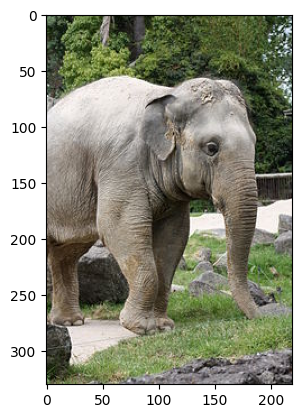

In [ ]:
img = cv.imread(IMG_TO_TEST_PATH)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
img = cv.resize(img, INPUT_SHAPE[:2])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = np.array(img) / 255
img = np.expand_dims(img, axis=0)

In [ ]:
prediction = np.argmax(model.predict(img))
animals[prediction], prediction

1/1 [==============================] - 5s 5s/step


('🐘', 2)